In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl
import traceback
import mne
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import ShuffleSplit, cross_val_score, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from mne.decoding import CSP, UnsupervisedSpatialFilter
from sklearn.decomposition import PCA
from Cho2017 import SubjectData

data_path = 'denoise_classify_data/'
subject_data_pickle_path = lambda n: os.path.join(data_path, 'data_{}.pkl'.format(n))
subject_ica_pickle_path = lambda n: os.path.join(data_path, 'ica_{}.pkl'.format(n))

plt.rcParams['figure.figsize'] = [12, 8]
# # Make sure ipympl is installed (via pip) for interactive plots in Jupyter 
# %matplotlib widget

In [2]:
# Parameters
ICA_SEED = 97 # Just some random seed
SPLIT_SEED = 42
n_ica_comps = 64

In [3]:
excludes = {}
with open('ica_head_left_right_excludes_SEED-97.pickle', 'rb') as f:
    excludes = pkl.load(f)



Subject 01
Loading denoise_classify_data/data_1.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading denoise_classify_data/ica_1.pkl
!! Excluding: [0, 4]
Transforming to ICA space (64 components)
Zeroing out 2 ICA components
(124, 64, 2561)
(124,)
Imagery Train Dataset Shape: (86, 64, 2561)
Imagery Test Dataset Shape: (38, 64, 2561)
Imagery Train Labels Shape: (86,)
Imagery Test Labels Shape: (38,)
Computing rank from data with rank=None
    Using tolerance 0.00019 (2.2e-16 eps * 64 dim * 1.3e+10  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 62
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.0002 (2.2e-16 eps * 64 dim * 1.4e+10  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    Setti

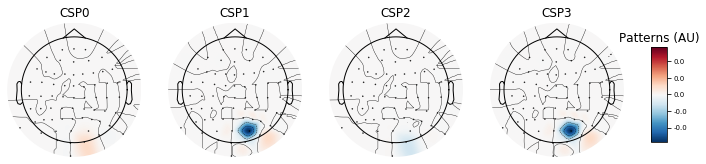



Subject 02
Loading denoise_classify_data/data_2.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading denoise_classify_data/ica_2.pkl
!! Excluding: [0, 1]
Transforming to ICA space (64 components)
Zeroing out 2 ICA components
(186, 64, 2561)
(186,)
Imagery Train Dataset Shape: (130, 64, 2561)
Imagery Test Dataset Shape: (56, 64, 2561)
Imagery Train Labels Shape: (130,)
Imagery Test Labels Shape: (56,)
Computing rank from data with rank=None
    Using tolerance 0.00016 (2.2e-16 eps * 64 dim * 1.1e+10  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 62
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00015 (2.2e-16 eps * 64 dim * 1e+10  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    Sett

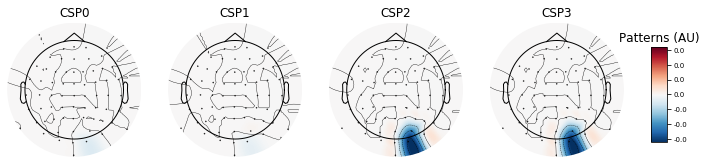



Subject 03
Loading denoise_classify_data/data_3.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading denoise_classify_data/ica_3.pkl
!! Excluding: [0, 1]
Transforming to ICA space (64 components)
Zeroing out 2 ICA components
(200, 64, 2561)
(200,)
Imagery Train Dataset Shape: (140, 64, 2561)
Imagery Test Dataset Shape: (60, 64, 2561)
Imagery Train Labels Shape: (140,)
Imagery Test Labels Shape: (60,)
Computing rank from data with rank=None
    Using tolerance 0.00017 (2.2e-16 eps * 64 dim * 1.2e+10  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 62
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00016 (2.2e-16 eps * 64 dim * 1.1e+10  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    Se

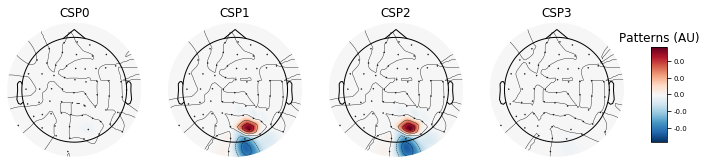



Subject 04
Loading denoise_classify_data/data_4.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading denoise_classify_data/ica_4.pkl
!! Excluding: [1, 36]
Transforming to ICA space (64 components)
Zeroing out 2 ICA components
(190, 64, 2561)
(190,)
Imagery Train Dataset Shape: (133, 64, 2561)
Imagery Test Dataset Shape: (57, 64, 2561)
Imagery Train Labels Shape: (133,)
Imagery Test Labels Shape: (57,)
Computing rank from data with rank=None
    Using tolerance 0.00025 (2.2e-16 eps * 64 dim * 1.8e+10  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 62
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00027 (2.2e-16 eps * 64 dim * 1.9e+10  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    S

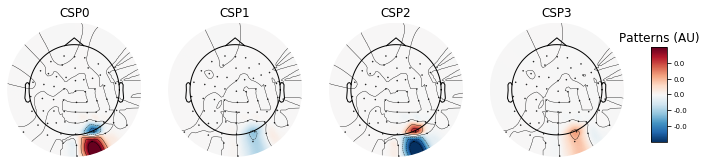



Subject 05
Loading denoise_classify_data/data_5.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading denoise_classify_data/ica_5.pkl
!! Excluding: [0, 1]
Transforming to ICA space (64 components)
Zeroing out 2 ICA components
(9, 64, 2561)
(9,)
Imagery Train Dataset Shape: (6, 64, 2561)
Imagery Test Dataset Shape: (3, 64, 2561)
Imagery Train Labels Shape: (6,)
Imagery Test Labels Shape: (3,)
Computing rank from data with rank=None
    Using tolerance 2.5e-05 (2.2e-16 eps * 64 dim * 1.7e+09  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 62
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 5.3e-05 (2.2e-16 eps * 64 dim * 3.7e+09  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    Setting smal

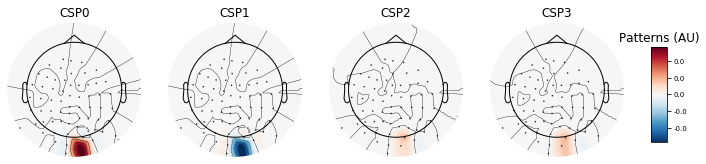



Subject 06
Loading denoise_classify_data/data_6.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading denoise_classify_data/ica_6.pkl
!! Excluding: [0, 1]
Transforming to ICA space (64 components)
Zeroing out 2 ICA components
(164, 64, 2561)
(164,)
Imagery Train Dataset Shape: (114, 64, 2561)
Imagery Test Dataset Shape: (50, 64, 2561)
Imagery Train Labels Shape: (114,)
Imagery Test Labels Shape: (50,)
Computing rank from data with rank=None
    Using tolerance 0.00016 (2.2e-16 eps * 64 dim * 1.2e+10  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 62
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00017 (2.2e-16 eps * 64 dim * 1.2e+10  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    Se

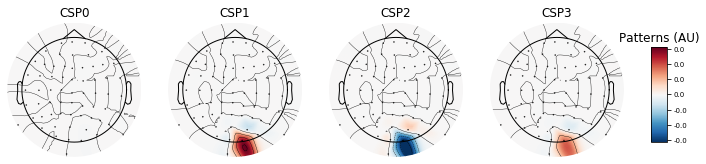



Subject 07
Loading denoise_classify_data/data_7.pkl
120 events found
Event IDs: [1]
120 events found
Event IDs: [1]
Loading denoise_classify_data/ica_7.pkl
!! Excluding: [0, 2]
Transforming to ICA space (64 components)
Zeroing out 2 ICA components
(237, 64, 2561)
(237,)
Imagery Train Dataset Shape: (165, 64, 2561)
Imagery Test Dataset Shape: (72, 64, 2561)
Imagery Train Labels Shape: (165,)
Imagery Test Labels Shape: (72,)
Computing rank from data with rank=None
    Using tolerance 0.00014 (2.2e-16 eps * 64 dim * 9.7e+09  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 62
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00014 (2.2e-16 eps * 64 dim * 9.7e+09  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    Se

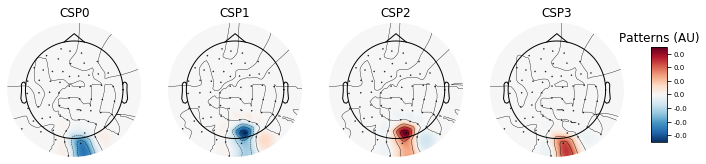



Subject 08
Loading denoise_classify_data/data_8.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading denoise_classify_data/ica_8.pkl
!! Excluding: [0, 1]
Transforming to ICA space (64 components)
Zeroing out 2 ICA components
(198, 64, 2561)
(198,)
Imagery Train Dataset Shape: (138, 64, 2561)
Imagery Test Dataset Shape: (60, 64, 2561)
Imagery Train Labels Shape: (138,)
Imagery Test Labels Shape: (60,)
Computing rank from data with rank=None
    Using tolerance 0.00015 (2.2e-16 eps * 64 dim * 1e+10  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 62
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00015 (2.2e-16 eps * 64 dim * 1e+10  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    Settin

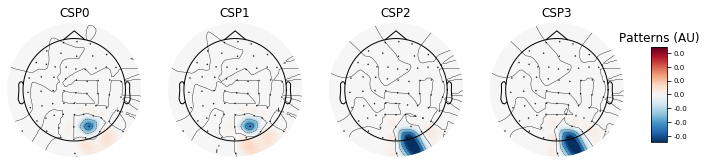



Subject 09
Loading denoise_classify_data/data_9.pkl
120 events found
Event IDs: [1]
120 events found
Event IDs: [1]
Loading denoise_classify_data/ica_9.pkl
!! Excluding: [0, 1]
Transforming to ICA space (64 components)
Zeroing out 2 ICA components
(239, 64, 2561)
(239,)
Imagery Train Dataset Shape: (167, 64, 2561)
Imagery Test Dataset Shape: (72, 64, 2561)
Imagery Train Labels Shape: (167,)
Imagery Test Labels Shape: (72,)
Computing rank from data with rank=None
    Using tolerance 0.00016 (2.2e-16 eps * 64 dim * 1.1e+10  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 62
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00014 (2.2e-16 eps * 64 dim * 1e+10  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    Sett

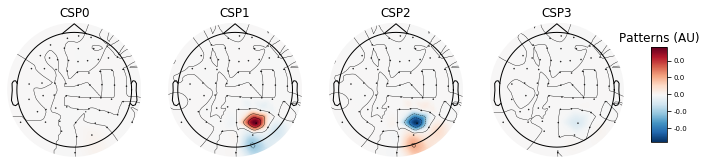



Subject 10
Loading denoise_classify_data/data_10.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading denoise_classify_data/ica_10.pkl
!! Excluding: [0, 3]
Transforming to ICA space (64 components)
Zeroing out 2 ICA components
(198, 64, 2561)
(198,)
Imagery Train Dataset Shape: (138, 64, 2561)
Imagery Test Dataset Shape: (60, 64, 2561)
Imagery Train Labels Shape: (138,)
Imagery Test Labels Shape: (60,)
Computing rank from data with rank=None
    Using tolerance 0.00018 (2.2e-16 eps * 64 dim * 1.2e+10  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 62
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00017 (2.2e-16 eps * 64 dim * 1.2e+10  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    

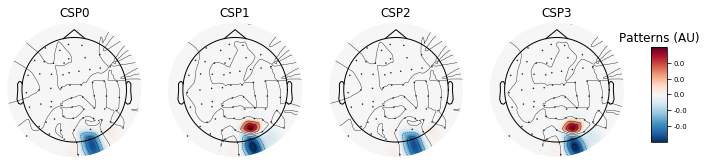



Subject 11
Loading denoise_classify_data/data_11.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading denoise_classify_data/ica_11.pkl
!! Excluding: [0, 3]
Transforming to ICA space (64 components)
Zeroing out 2 ICA components
(185, 64, 2561)
(185,)
Imagery Train Dataset Shape: (129, 64, 2561)
Imagery Test Dataset Shape: (56, 64, 2561)
Imagery Train Labels Shape: (129,)
Imagery Test Labels Shape: (56,)
Computing rank from data with rank=None
    Using tolerance 0.0002 (2.2e-16 eps * 64 dim * 1.4e+10  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 62
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.0002 (2.2e-16 eps * 64 dim * 1.4e+10  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    Se

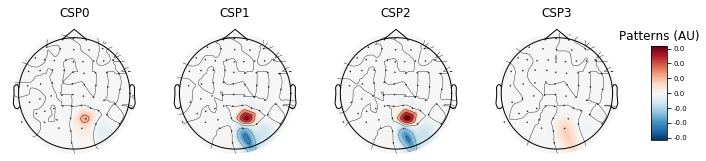



Subject 12
Loading denoise_classify_data/data_12.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading denoise_classify_data/ica_12.pkl
!! Excluding: [2, 3]
Transforming to ICA space (64 components)
Zeroing out 2 ICA components
(106, 64, 2561)
(106,)
Imagery Train Dataset Shape: (74, 64, 2561)
Imagery Test Dataset Shape: (32, 64, 2561)
Imagery Train Labels Shape: (74,)
Imagery Test Labels Shape: (32,)
Computing rank from data with rank=None
    Using tolerance 0.00023 (2.2e-16 eps * 64 dim * 1.6e+10  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 62
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00029 (2.2e-16 eps * 64 dim * 2.1e+10  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    Se

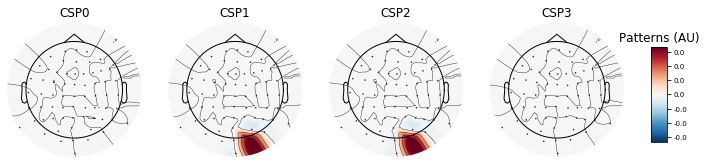



Subject 13
Loading denoise_classify_data/data_13.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading denoise_classify_data/ica_13.pkl
!! Excluding: [0, 1]
Transforming to ICA space (64 components)
Zeroing out 2 ICA components
(160, 64, 2561)
(160,)
Imagery Train Dataset Shape: (112, 64, 2561)
Imagery Test Dataset Shape: (48, 64, 2561)
Imagery Train Labels Shape: (112,)
Imagery Test Labels Shape: (48,)
Computing rank from data with rank=None
    Using tolerance 0.00022 (2.2e-16 eps * 64 dim * 1.5e+10  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 62
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00022 (2.2e-16 eps * 64 dim * 1.5e+10  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    

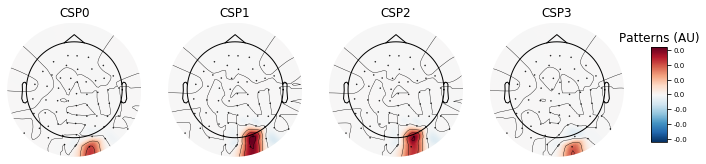



Subject 14
Loading denoise_classify_data/data_14.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading denoise_classify_data/ica_14.pkl
!! Excluding: [0, 1]
Transforming to ICA space (64 components)
Zeroing out 2 ICA components
(196, 64, 2561)
(196,)
Imagery Train Dataset Shape: (137, 64, 2561)
Imagery Test Dataset Shape: (59, 64, 2561)
Imagery Train Labels Shape: (137,)
Imagery Test Labels Shape: (59,)
Computing rank from data with rank=None
    Using tolerance 0.00022 (2.2e-16 eps * 64 dim * 1.5e+10  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 62
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00022 (2.2e-16 eps * 64 dim * 1.6e+10  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    

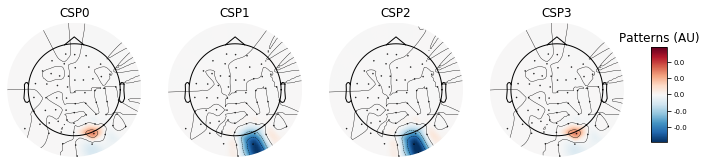



Subject 15
Loading denoise_classify_data/data_15.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading denoise_classify_data/ica_15.pkl
!! Excluding: [17, 20]
Transforming to ICA space (64 components)
Zeroing out 2 ICA components
(171, 64, 2561)
(171,)
Imagery Train Dataset Shape: (119, 64, 2561)
Imagery Test Dataset Shape: (52, 64, 2561)
Imagery Train Labels Shape: (119,)
Imagery Test Labels Shape: (52,)
Computing rank from data with rank=None
    Using tolerance 0.00015 (2.2e-16 eps * 64 dim * 1e+10  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 62
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00017 (2.2e-16 eps * 64 dim * 1.2e+10  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    

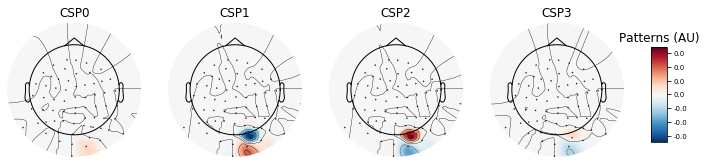



Subject 16
Loading denoise_classify_data/data_16.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading denoise_classify_data/ica_16.pkl
!! Excluding: [24, 2]
Transforming to ICA space (64 components)
Zeroing out 2 ICA components
(193, 64, 2561)
(193,)
Imagery Train Dataset Shape: (135, 64, 2561)
Imagery Test Dataset Shape: (58, 64, 2561)
Imagery Train Labels Shape: (135,)
Imagery Test Labels Shape: (58,)
Computing rank from data with rank=None
    Using tolerance 0.00018 (2.2e-16 eps * 64 dim * 1.3e+10  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 62
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00017 (2.2e-16 eps * 64 dim * 1.2e+10  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
   

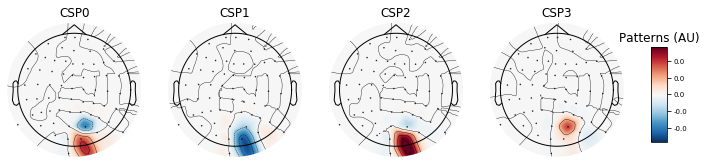



Subject 17
Loading denoise_classify_data/data_17.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading denoise_classify_data/ica_17.pkl
!! Excluding: [0, 1]
Transforming to ICA space (64 components)
Zeroing out 2 ICA components
(194, 64, 2561)
(194,)
Imagery Train Dataset Shape: (135, 64, 2561)
Imagery Test Dataset Shape: (59, 64, 2561)
Imagery Train Labels Shape: (135,)
Imagery Test Labels Shape: (59,)
Computing rank from data with rank=None
    Using tolerance 0.00014 (2.2e-16 eps * 64 dim * 1e+10  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 62
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00014 (2.2e-16 eps * 64 dim * 9.9e+09  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    Se

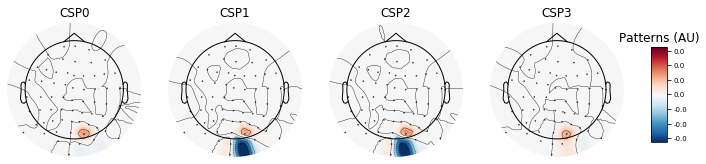



Subject 18
Loading denoise_classify_data/data_18.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading denoise_classify_data/ica_18.pkl
!! Excluding: [0, 3]
Transforming to ICA space (64 components)
Zeroing out 2 ICA components
(195, 64, 2561)
(195,)
Imagery Train Dataset Shape: (136, 64, 2561)
Imagery Test Dataset Shape: (59, 64, 2561)
Imagery Train Labels Shape: (136,)
Imagery Test Labels Shape: (59,)
Computing rank from data with rank=None
    Using tolerance 0.00015 (2.2e-16 eps * 64 dim * 1e+10  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 62
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00014 (2.2e-16 eps * 64 dim * 9.9e+09  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    Se

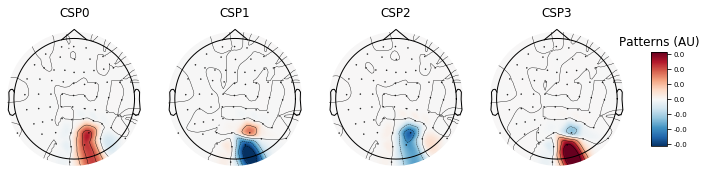



Subject 19
Loading denoise_classify_data/data_19.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading denoise_classify_data/ica_19.pkl
!! Excluding: [0, 2]
Transforming to ICA space (64 components)
Zeroing out 2 ICA components
(180, 64, 2561)
(180,)
Imagery Train Dataset Shape: (126, 64, 2561)
Imagery Test Dataset Shape: (54, 64, 2561)
Imagery Train Labels Shape: (126,)
Imagery Test Labels Shape: (54,)
Computing rank from data with rank=None
    Using tolerance 0.00013 (2.2e-16 eps * 64 dim * 9.1e+09  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 62
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00013 (2.2e-16 eps * 64 dim * 8.9e+09  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    

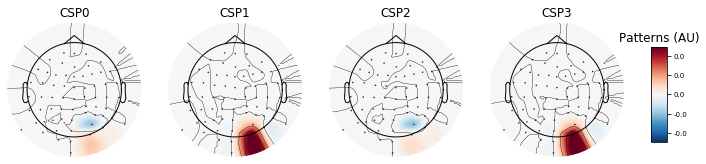



Subject 20
Loading denoise_classify_data/data_20.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading denoise_classify_data/ica_20.pkl
!! Excluding: [1, 8]
Transforming to ICA space (64 components)
Zeroing out 2 ICA components
(182, 64, 2561)
(182,)
Imagery Train Dataset Shape: (127, 64, 2561)
Imagery Test Dataset Shape: (55, 64, 2561)
Imagery Train Labels Shape: (127,)
Imagery Test Labels Shape: (55,)
Computing rank from data with rank=None
    Using tolerance 0.00025 (2.2e-16 eps * 64 dim * 1.8e+10  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 62
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00026 (2.2e-16 eps * 64 dim * 1.8e+10  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    

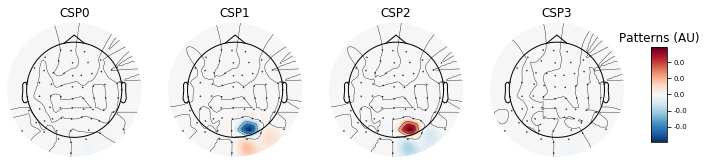



Subject 21
Loading denoise_classify_data/data_21.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading denoise_classify_data/ica_21.pkl
!! Excluding: [9, 2]
Transforming to ICA space (64 components)
Zeroing out 2 ICA components
(198, 64, 2561)
(198,)
Imagery Train Dataset Shape: (138, 64, 2561)
Imagery Test Dataset Shape: (60, 64, 2561)
Imagery Train Labels Shape: (138,)
Imagery Test Labels Shape: (60,)
Computing rank from data with rank=None
    Using tolerance 0.00028 (2.2e-16 eps * 64 dim * 2e+10  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 62
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00025 (2.2e-16 eps * 64 dim * 1.7e+10  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    Se

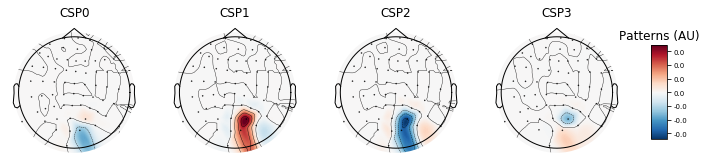



Subject 22
Loading denoise_classify_data/data_22.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading denoise_classify_data/ica_22.pkl
!! Excluding: [0, 1]
Transforming to ICA space (64 components)
Zeroing out 2 ICA components
(167, 64, 2561)
(167,)
Imagery Train Dataset Shape: (116, 64, 2561)
Imagery Test Dataset Shape: (51, 64, 2561)
Imagery Train Labels Shape: (116,)
Imagery Test Labels Shape: (51,)
Computing rank from data with rank=None
    Using tolerance 0.00014 (2.2e-16 eps * 64 dim * 9.5e+09  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 62
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00012 (2.2e-16 eps * 64 dim * 8.7e+09  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    

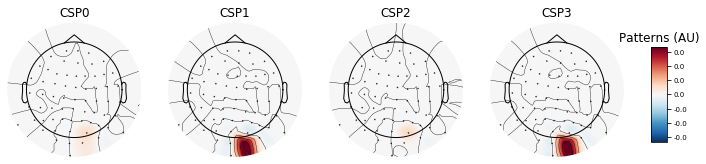



Subject 23
Loading denoise_classify_data/data_23.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading denoise_classify_data/ica_23.pkl
!! Excluding: [0, 1]
Transforming to ICA space (64 components)
Zeroing out 2 ICA components
(188, 64, 2561)
(188,)
Imagery Train Dataset Shape: (131, 64, 2561)
Imagery Test Dataset Shape: (57, 64, 2561)
Imagery Train Labels Shape: (131,)
Imagery Test Labels Shape: (57,)
Computing rank from data with rank=None
    Using tolerance 0.00017 (2.2e-16 eps * 64 dim * 1.2e+10  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 62
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00017 (2.2e-16 eps * 64 dim * 1.2e+10  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    

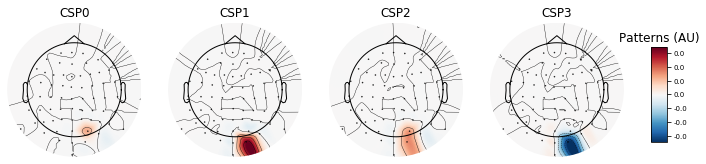



Subject 24
Loading denoise_classify_data/data_24.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading denoise_classify_data/ica_24.pkl
!! Excluding: [0, 1]
Transforming to ICA space (64 components)
Zeroing out 2 ICA components
(187, 64, 2561)
(187,)
Imagery Train Dataset Shape: (130, 64, 2561)
Imagery Test Dataset Shape: (57, 64, 2561)
Imagery Train Labels Shape: (130,)
Imagery Test Labels Shape: (57,)
Computing rank from data with rank=None
    Using tolerance 0.00014 (2.2e-16 eps * 64 dim * 1e+10  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 62
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00014 (2.2e-16 eps * 64 dim * 9.8e+09  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    Se

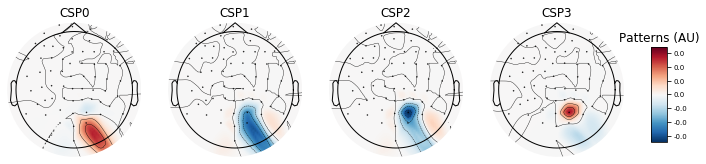



Subject 25
Loading denoise_classify_data/data_25.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading denoise_classify_data/ica_25.pkl
!! Excluding: [0, 1]
Transforming to ICA space (64 components)
Zeroing out 2 ICA components
(190, 64, 2561)
(190,)
Imagery Train Dataset Shape: (133, 64, 2561)
Imagery Test Dataset Shape: (57, 64, 2561)
Imagery Train Labels Shape: (133,)
Imagery Test Labels Shape: (57,)
Computing rank from data with rank=None
    Using tolerance 0.0002 (2.2e-16 eps * 64 dim * 1.4e+10  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 62
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.0002 (2.2e-16 eps * 64 dim * 1.4e+10  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    Se

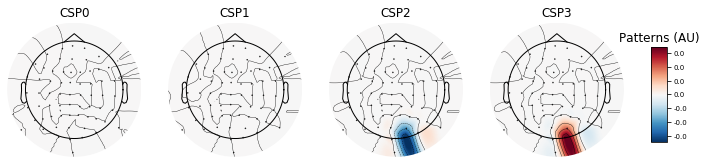



Subject 26
Loading denoise_classify_data/data_26.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading denoise_classify_data/ica_26.pkl
!! Excluding: [0, 1]
Transforming to ICA space (64 components)
Zeroing out 2 ICA components
(191, 64, 2561)
(191,)
Imagery Train Dataset Shape: (133, 64, 2561)
Imagery Test Dataset Shape: (58, 64, 2561)
Imagery Train Labels Shape: (133,)
Imagery Test Labels Shape: (58,)
Computing rank from data with rank=None
    Using tolerance 0.00018 (2.2e-16 eps * 64 dim * 1.3e+10  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 62
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00018 (2.2e-16 eps * 64 dim * 1.2e+10  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    

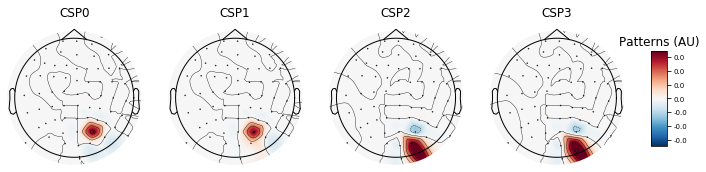



Subject 27
Loading denoise_classify_data/data_27.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading denoise_classify_data/ica_27.pkl
!! Excluding: [0, 1]
Transforming to ICA space (64 components)
Zeroing out 2 ICA components
(153, 64, 2561)
(153,)
Imagery Train Dataset Shape: (107, 64, 2561)
Imagery Test Dataset Shape: (46, 64, 2561)
Imagery Train Labels Shape: (107,)
Imagery Test Labels Shape: (46,)
Computing rank from data with rank=None
    Using tolerance 0.00012 (2.2e-16 eps * 64 dim * 8.5e+09  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 62
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00013 (2.2e-16 eps * 64 dim * 8.9e+09  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    

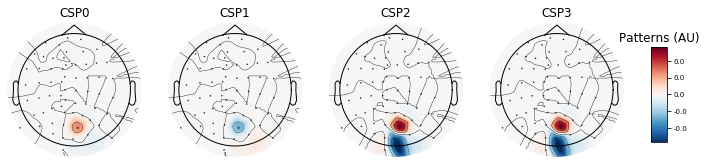



Subject 28
Loading denoise_classify_data/data_28.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading denoise_classify_data/ica_28.pkl
Error Subject 28


Subject 29
Loading denoise_classify_data/data_29.pkl


Traceback (most recent call last):
  File "<ipython-input-4-b6a0623c90b1>", line 46, in <module>
    print('!! Excluding: {}'.format(excludes[subj_n][:2]))
KeyError: 28


100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading denoise_classify_data/ica_29.pkl
!! Excluding: [0, 1]
Transforming to ICA space (64 components)
Zeroing out 2 ICA components
(198, 64, 2561)
(198,)
Imagery Train Dataset Shape: (138, 64, 2561)
Imagery Test Dataset Shape: (60, 64, 2561)
Imagery Train Labels Shape: (138,)
Imagery Test Labels Shape: (60,)
Computing rank from data with rank=None
    Using tolerance 0.00011 (2.2e-16 eps * 64 dim * 7.5e+09  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 62
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.0001 (2.2e-16 eps * 64 dim * 7.3e+09  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Redu

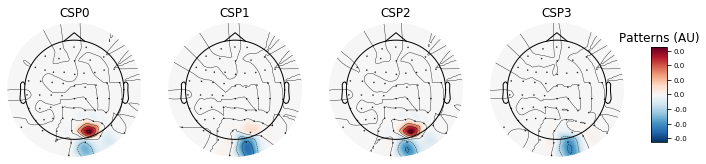



Subject 30
Loading denoise_classify_data/data_30.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading denoise_classify_data/ica_30.pkl
!! Excluding: [0, 1]
Transforming to ICA space (64 components)
Zeroing out 2 ICA components
(199, 64, 2561)
(199,)
Imagery Train Dataset Shape: (139, 64, 2561)
Imagery Test Dataset Shape: (60, 64, 2561)
Imagery Train Labels Shape: (139,)
Imagery Test Labels Shape: (60,)
Computing rank from data with rank=None
    Using tolerance 0.00011 (2.2e-16 eps * 64 dim * 7.6e+09  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 62
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00011 (2.2e-16 eps * 64 dim * 7.7e+09  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    

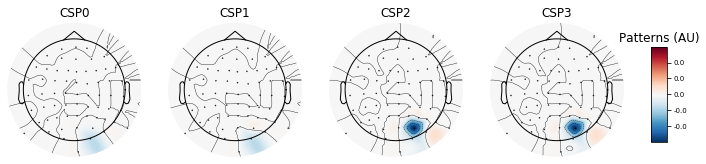



Subject 31
Loading denoise_classify_data/data_31.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading denoise_classify_data/ica_31.pkl
!! Excluding: [8, 25]
Transforming to ICA space (64 components)
Zeroing out 2 ICA components
(196, 64, 2561)
(196,)
Imagery Train Dataset Shape: (137, 64, 2561)
Imagery Test Dataset Shape: (59, 64, 2561)
Imagery Train Labels Shape: (137,)
Imagery Test Labels Shape: (59,)
Computing rank from data with rank=None
    Using tolerance 0.0002 (2.2e-16 eps * 64 dim * 1.4e+10  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 62
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.0002 (2.2e-16 eps * 64 dim * 1.4e+10  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    S

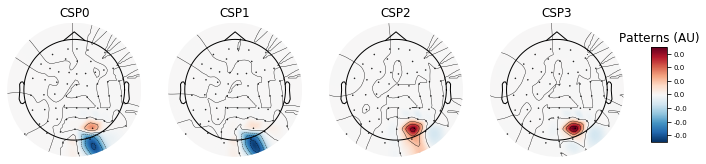



Subject 32
Loading denoise_classify_data/data_32.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading denoise_classify_data/ica_32.pkl
!! Excluding: [0, 7]
Transforming to ICA space (64 components)
Zeroing out 2 ICA components
(182, 64, 2561)
(182,)
Imagery Train Dataset Shape: (127, 64, 2561)
Imagery Test Dataset Shape: (55, 64, 2561)
Imagery Train Labels Shape: (127,)
Imagery Test Labels Shape: (55,)
Computing rank from data with rank=None
    Using tolerance 0.00017 (2.2e-16 eps * 64 dim * 1.2e+10  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 62
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00016 (2.2e-16 eps * 64 dim * 1.1e+10  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    

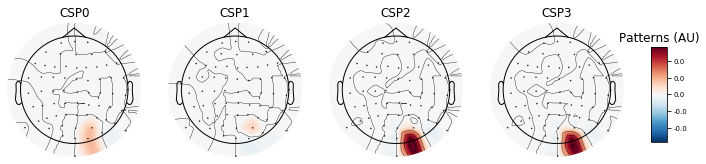



Subject 33
Loading denoise_classify_data/data_33.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading denoise_classify_data/ica_33.pkl
!! Excluding: [0, 32]
Transforming to ICA space (64 components)
Zeroing out 2 ICA components
Error Subject 33


Subject 34
Loading denoise_classify_data/data_34.pkl


Traceback (most recent call last):
  File "<ipython-input-4-b6a0623c90b1>", line 52, in <module>
    im_data = UnsupervisedSpatialFilter(PCA()).fit_transform(im_data)
  File "/home/justin/.local/lib/python3.6/site-packages/mne/decoding/transformer.py", line 631, in fit_transform
    return self.fit(X).transform(X)
  File "/home/justin/.local/lib/python3.6/site-packages/mne/decoding/transformer.py", line 613, in fit
    self.estimator.fit(X)
  File "/home/justin/.local/lib/python3.6/site-packages/sklearn/decomposition/_pca.py", line 351, in fit
    self._fit(X)
  File "/home/justin/.local/lib/python3.6/site-packages/sklearn/decomposition/_pca.py", line 398, in _fit
    ensure_2d=True, copy=self.copy)
  File "/home/justin/.local/lib/python3.6/site-packages/sklearn/base.py", line 420, in _validate_data
    X = check_array(X, **check_params)
  File "/home/justin/.local/lib/python3.6/site-packages/sklearn/utils/validation.py", line 73, in inner_f
    return f(**kwargs)
  File "/home/justin/

100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading denoise_classify_data/ica_34.pkl
!! Excluding: [0, 34]
Transforming to ICA space (64 components)
Zeroing out 2 ICA components
(199, 64, 2561)
(199,)
Imagery Train Dataset Shape: (139, 64, 2561)
Imagery Test Dataset Shape: (60, 64, 2561)
Imagery Train Labels Shape: (139,)
Imagery Test Labels Shape: (60,)
Computing rank from data with rank=None
    Using tolerance 0.00012 (2.2e-16 eps * 64 dim * 8.5e+09  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 62
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00011 (2.2e-16 eps * 64 dim * 8e+09  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Redu

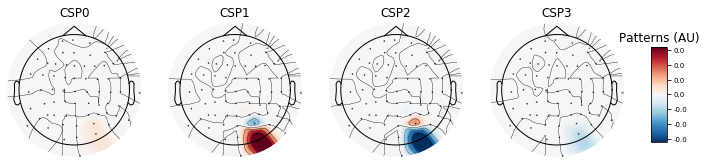



Subject 35
Loading denoise_classify_data/data_35.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading denoise_classify_data/ica_35.pkl
!! Excluding: [0, 1]
Transforming to ICA space (64 components)
Zeroing out 2 ICA components
(200, 64, 2561)
(200,)
Imagery Train Dataset Shape: (140, 64, 2561)
Imagery Test Dataset Shape: (60, 64, 2561)
Imagery Train Labels Shape: (140,)
Imagery Test Labels Shape: (60,)
Computing rank from data with rank=None
    Using tolerance 0.00011 (2.2e-16 eps * 64 dim * 7.9e+09  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 62
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00012 (2.2e-16 eps * 64 dim * 8.2e+09  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    

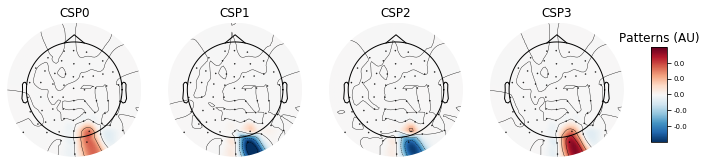



Subject 36
Loading denoise_classify_data/data_36.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading denoise_classify_data/ica_36.pkl
!! Excluding: [0, 1]
Transforming to ICA space (64 components)
Zeroing out 2 ICA components
(196, 64, 2561)
(196,)
Imagery Train Dataset Shape: (137, 64, 2561)
Imagery Test Dataset Shape: (59, 64, 2561)
Imagery Train Labels Shape: (137,)
Imagery Test Labels Shape: (59,)
Computing rank from data with rank=None
    Using tolerance 0.00017 (2.2e-16 eps * 64 dim * 1.2e+10  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 62
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00018 (2.2e-16 eps * 64 dim * 1.2e+10  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    

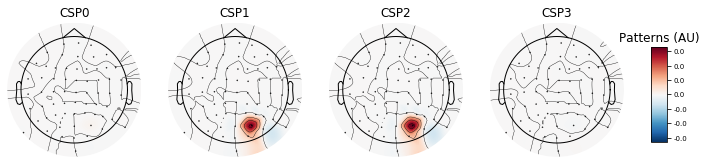



Subject 37
Loading denoise_classify_data/data_37.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading denoise_classify_data/ica_37.pkl
!! Excluding: [0, 1]
Transforming to ICA space (64 components)
Zeroing out 2 ICA components
(144, 64, 2561)
(144,)
Imagery Train Dataset Shape: (100, 64, 2561)
Imagery Test Dataset Shape: (44, 64, 2561)
Imagery Train Labels Shape: (100,)
Imagery Test Labels Shape: (44,)
Computing rank from data with rank=None
    Using tolerance 0.00014 (2.2e-16 eps * 64 dim * 9.8e+09  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 62
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00013 (2.2e-16 eps * 64 dim * 8.9e+09  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    

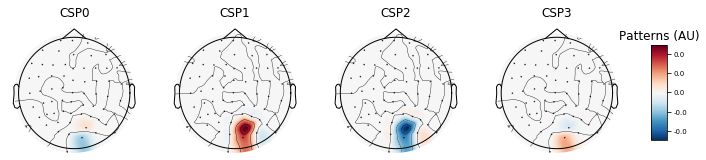



Subject 38
Loading denoise_classify_data/data_38.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading denoise_classify_data/ica_38.pkl
!! Excluding: [1, 15]
Transforming to ICA space (64 components)
Zeroing out 2 ICA components
(194, 64, 2561)
(194,)
Imagery Train Dataset Shape: (135, 64, 2561)
Imagery Test Dataset Shape: (59, 64, 2561)
Imagery Train Labels Shape: (135,)
Imagery Test Labels Shape: (59,)
Computing rank from data with rank=None
    Using tolerance 0.00011 (2.2e-16 eps * 64 dim * 7.6e+09  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 62
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00012 (2.2e-16 eps * 64 dim * 8.5e+09  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
   

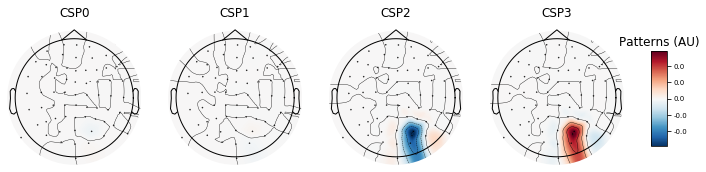



Subject 39
Loading denoise_classify_data/data_39.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading denoise_classify_data/ica_39.pkl
!! Excluding: [0, 1]
Transforming to ICA space (64 components)
Zeroing out 2 ICA components
(27, 64, 2561)
(27,)
Imagery Train Dataset Shape: (18, 64, 2561)
Imagery Test Dataset Shape: (9, 64, 2561)
Imagery Train Labels Shape: (18,)
Imagery Test Labels Shape: (9,)
Computing rank from data with rank=None
    Using tolerance 0.00011 (2.2e-16 eps * 64 dim * 7.4e+09  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 62
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00013 (2.2e-16 eps * 64 dim * 8.9e+09  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    Settin

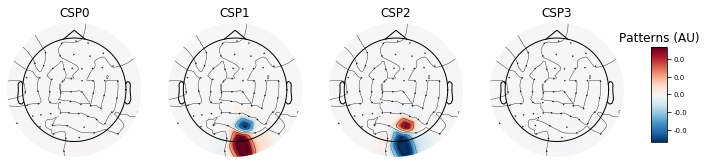



Subject 40
Loading denoise_classify_data/data_40.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading denoise_classify_data/ica_40.pkl
!! Excluding: [0, 1]
Transforming to ICA space (64 components)
Zeroing out 2 ICA components
(200, 64, 2561)
(200,)
Imagery Train Dataset Shape: (140, 64, 2561)
Imagery Test Dataset Shape: (60, 64, 2561)
Imagery Train Labels Shape: (140,)
Imagery Test Labels Shape: (60,)
Computing rank from data with rank=None
    Using tolerance 0.00015 (2.2e-16 eps * 64 dim * 1.1e+10  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 62
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00016 (2.2e-16 eps * 64 dim * 1.1e+10  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    

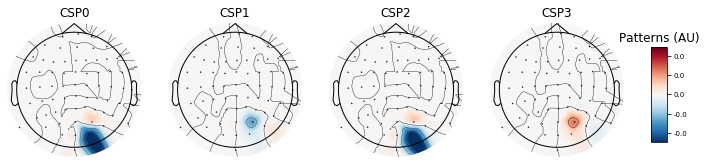



Subject 41
Loading denoise_classify_data/data_41.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading denoise_classify_data/ica_41.pkl
!! Excluding: [0, 2]
Transforming to ICA space (64 components)
Zeroing out 2 ICA components
(183, 64, 2561)
(183,)
Imagery Train Dataset Shape: (128, 64, 2561)
Imagery Test Dataset Shape: (55, 64, 2561)
Imagery Train Labels Shape: (128,)
Imagery Test Labels Shape: (55,)
Computing rank from data with rank=None
    Using tolerance 0.00021 (2.2e-16 eps * 64 dim * 1.5e+10  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 62
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00022 (2.2e-16 eps * 64 dim * 1.6e+10  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    

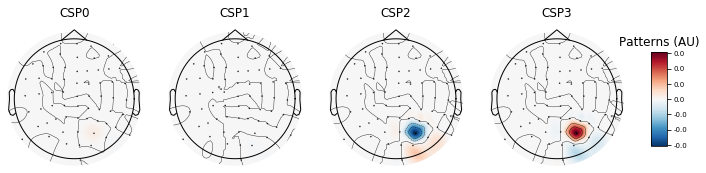



Subject 42
Loading denoise_classify_data/data_42.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading denoise_classify_data/ica_42.pkl
!! Excluding: [2, 4]
Transforming to ICA space (64 components)
Zeroing out 2 ICA components
(200, 64, 2561)
(200,)
Imagery Train Dataset Shape: (140, 64, 2561)
Imagery Test Dataset Shape: (60, 64, 2561)
Imagery Train Labels Shape: (140,)
Imagery Test Labels Shape: (60,)
Computing rank from data with rank=None
    Using tolerance 0.00013 (2.2e-16 eps * 64 dim * 9.5e+09  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 62
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00014 (2.2e-16 eps * 64 dim * 9.8e+09  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    

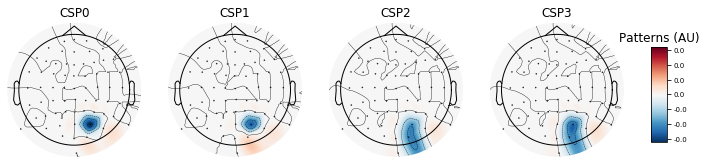



Subject 43
Loading denoise_classify_data/data_43.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading denoise_classify_data/ica_43.pkl
!! Excluding: [0, 1]
Transforming to ICA space (64 components)
Zeroing out 2 ICA components
(178, 64, 2561)
(178,)
Imagery Train Dataset Shape: (124, 64, 2561)
Imagery Test Dataset Shape: (54, 64, 2561)
Imagery Train Labels Shape: (124,)
Imagery Test Labels Shape: (54,)
Computing rank from data with rank=None
    Using tolerance 0.00019 (2.2e-16 eps * 64 dim * 1.4e+10  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 62
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.0002 (2.2e-16 eps * 64 dim * 1.4e+10  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    S

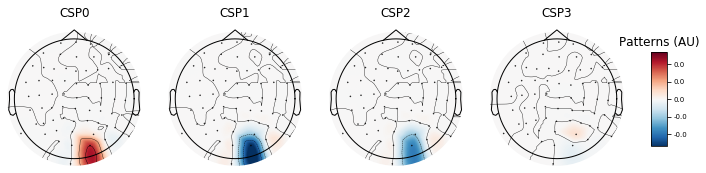



Subject 44
Loading denoise_classify_data/data_44.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading denoise_classify_data/ica_44.pkl
!! Excluding: [0, 1]
Transforming to ICA space (64 components)
Zeroing out 2 ICA components
(69, 64, 2561)
(69,)
Imagery Train Dataset Shape: (48, 64, 2561)
Imagery Test Dataset Shape: (21, 64, 2561)
Imagery Train Labels Shape: (48,)
Imagery Test Labels Shape: (21,)
Computing rank from data with rank=None
    Using tolerance 0.00013 (2.2e-16 eps * 64 dim * 9.1e+09  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 62
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00014 (2.2e-16 eps * 64 dim * 1e+10  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    Settin

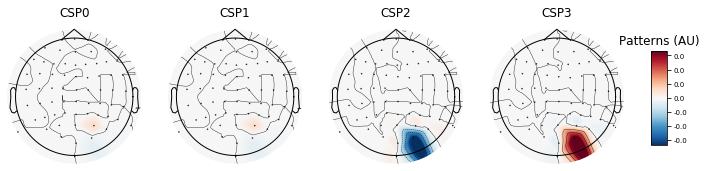



Subject 45
Loading denoise_classify_data/data_45.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading denoise_classify_data/ica_45.pkl
!! Excluding: [0, 1]
Transforming to ICA space (64 components)
Zeroing out 2 ICA components
(163, 64, 2561)
(163,)
Imagery Train Dataset Shape: (114, 64, 2561)
Imagery Test Dataset Shape: (49, 64, 2561)
Imagery Train Labels Shape: (114,)
Imagery Test Labels Shape: (49,)
Computing rank from data with rank=None
    Using tolerance 0.00011 (2.2e-16 eps * 64 dim * 7.8e+09  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 62
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00011 (2.2e-16 eps * 64 dim * 7.8e+09  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    

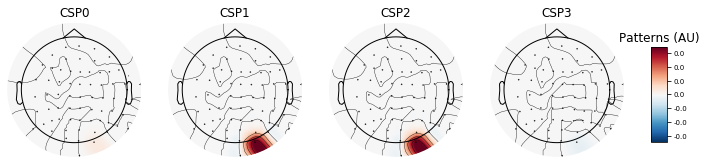



Subject 46
Loading denoise_classify_data/data_46.pkl
120 events found
Event IDs: [1]
120 events found
Event IDs: [1]
Loading denoise_classify_data/ica_46.pkl
!! Excluding: [0, 33]
Transforming to ICA space (64 components)
Zeroing out 2 ICA components
(221, 64, 2561)
(221,)
Imagery Train Dataset Shape: (154, 64, 2561)
Imagery Test Dataset Shape: (67, 64, 2561)
Imagery Train Labels Shape: (154,)
Imagery Test Labels Shape: (67,)
Computing rank from data with rank=None
    Using tolerance 0.00028 (2.2e-16 eps * 64 dim * 1.9e+10  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 62
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00027 (2.2e-16 eps * 64 dim * 1.9e+10  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
   

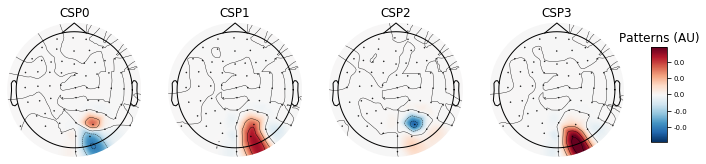



Subject 47
Loading denoise_classify_data/data_47.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading denoise_classify_data/ica_47.pkl
Error Subject 47


Subject 48
Loading denoise_classify_data/data_48.pkl


Traceback (most recent call last):
  File "<ipython-input-4-b6a0623c90b1>", line 46, in <module>
    print('!! Excluding: {}'.format(excludes[subj_n][:2]))
KeyError: 47


100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading denoise_classify_data/ica_48.pkl
!! Excluding: [0, 1]
Transforming to ICA space (64 components)
Zeroing out 2 ICA components
(128, 64, 2561)
(128,)
Imagery Train Dataset Shape: (89, 64, 2561)
Imagery Test Dataset Shape: (39, 64, 2561)
Imagery Train Labels Shape: (89,)
Imagery Test Labels Shape: (39,)
Computing rank from data with rank=None
    Using tolerance 0.00033 (2.2e-16 eps * 64 dim * 2.3e+10  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 62
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00034 (2.2e-16 eps * 64 dim * 2.4e+10  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reduc

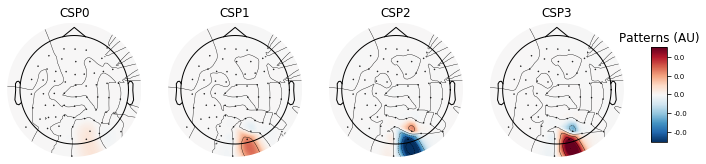



Subject 49
Loading denoise_classify_data/data_49.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading denoise_classify_data/ica_49.pkl
!! Excluding: [0, 1]
Transforming to ICA space (64 components)
Zeroing out 2 ICA components
(192, 64, 2561)
(192,)
Imagery Train Dataset Shape: (134, 64, 2561)
Imagery Test Dataset Shape: (58, 64, 2561)
Imagery Train Labels Shape: (134,)
Imagery Test Labels Shape: (58,)
Computing rank from data with rank=None
    Using tolerance 0.00026 (2.2e-16 eps * 64 dim * 1.8e+10  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 62
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00024 (2.2e-16 eps * 64 dim * 1.7e+10  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    

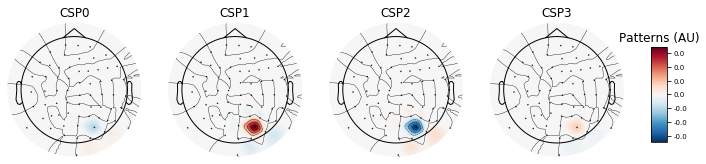



Subject 50
Loading denoise_classify_data/data_50.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading denoise_classify_data/ica_50.pkl
!! Excluding: [0, 1]
Transforming to ICA space (64 components)
Zeroing out 2 ICA components
(194, 64, 2561)
(194,)
Imagery Train Dataset Shape: (135, 64, 2561)
Imagery Test Dataset Shape: (59, 64, 2561)
Imagery Train Labels Shape: (135,)
Imagery Test Labels Shape: (59,)
Computing rank from data with rank=None
    Using tolerance 0.00018 (2.2e-16 eps * 64 dim * 1.3e+10  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 62
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00018 (2.2e-16 eps * 64 dim * 1.3e+10  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    

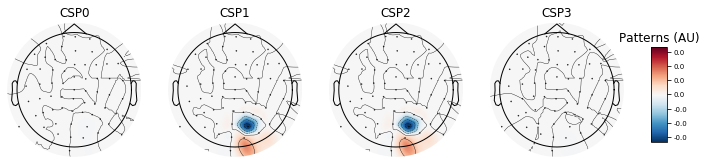



Subject 51
Loading denoise_classify_data/data_51.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading denoise_classify_data/ica_51.pkl
!! Excluding: [0, 1]
Transforming to ICA space (64 components)
Zeroing out 2 ICA components
(195, 64, 2561)
(195,)
Imagery Train Dataset Shape: (136, 64, 2561)
Imagery Test Dataset Shape: (59, 64, 2561)
Imagery Train Labels Shape: (136,)
Imagery Test Labels Shape: (59,)
Computing rank from data with rank=None
    Using tolerance 0.00017 (2.2e-16 eps * 64 dim * 1.2e+10  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 62
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00017 (2.2e-16 eps * 64 dim * 1.2e+10  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    

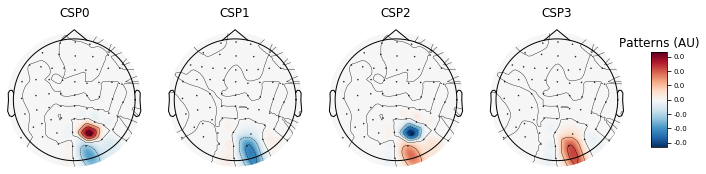



Subject 52
Loading denoise_classify_data/data_52.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading denoise_classify_data/ica_52.pkl
!! Excluding: [0, 2]
Transforming to ICA space (64 components)
Zeroing out 2 ICA components
(197, 64, 2561)
(197,)
Imagery Train Dataset Shape: (137, 64, 2561)
Imagery Test Dataset Shape: (60, 64, 2561)
Imagery Train Labels Shape: (137,)
Imagery Test Labels Shape: (60,)
Computing rank from data with rank=None
    Using tolerance 0.00016 (2.2e-16 eps * 64 dim * 1.1e+10  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 62
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00015 (2.2e-16 eps * 64 dim * 1.1e+10  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    

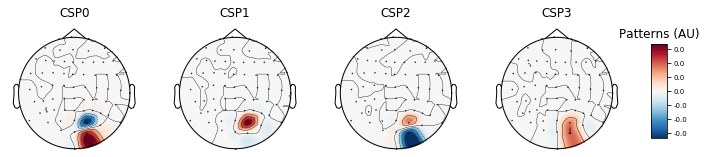

In [4]:
tmin = -1
tmax = 4
reject_criteria = {'eeg': 100e-6}       # 150 µV The default from the overview tutorial
filter_freqs = (7, 30)
filter_props = dict(picks=['eeg'], fir_design='firwin', skip_by_annotation='edge')
train_classification_accuracies = dict()
test_classification_accuracies = dict()

if not os.path.exists(data_path):
    os.mkdir(data_path)

for subj_n in range(1, 53):
    print("\n\n========================================")
    print('Subject {:02d}'.format(subj_n))
    print("========================================")
    if os.path.exists(subject_data_pickle_path(subj_n)):
        with open(subject_data_pickle_path(subj_n), 'rb') as f:
            print('Loading', subject_data_pickle_path(subj_n))
            data = pkl.load(f)
    else:
        data = SubjectData('Cho2017-Data/s{:02d}.mat'.format(subj_n))
        with open(subject_data_pickle_path(subj_n), 'wb') as f:
            pkl.dump(data, f)
    try:
        im_left_epochs = data.get_epochs('imagery_left', tmin=tmin, tmax=tmax, picks=['eeg'], filter_freqs=(1, None), reject_criteria=None, verbose=False)
        im_right_epochs = data.get_epochs('imagery_right', tmin=tmin, tmax=tmax, picks=['eeg'], filter_freqs=(1, None), reject_criteria=None, verbose=False)
        # Set left events to 0 to have 2 distinct class labels (left: 0 and right: 1)
        im_left_epochs.events[:, -1] = 0
        im_left_epochs.event_id = {'0': 0}

        joint_im_epochs = mne.concatenate_epochs([im_left_epochs.copy(), im_right_epochs.copy()], add_offset=True)
        
        
        if os.path.exists(subject_ica_pickle_path(subj_n)):
            with open(subject_ica_pickle_path(subj_n), 'rb') as f:
                print('Loading', subject_ica_pickle_path(subj_n))
                ica_joint = pkl.load(f)
        else:
            ica_joint = mne.preprocessing.ICA(n_components=n_ica_comps, random_state=ICA_SEED, max_iter=1000)
            ica_joint.fit(joint_im_epochs)
            with open(subject_ica_pickle_path(subj_n), 'wb') as f:
                print('Writing', subject_ica_pickle_path(subj_n))
                pkl.dump(ica_joint, f)
            
        
        print('!! Excluding: {}'.format(excludes[subj_n][:2]))
        ica_joint.exclude = excludes[subj_n][:2]
        ica_joint.apply(joint_im_epochs)
        joint_im_epochs.filter(*filter_freqs, **filter_props).drop_bad(reject_criteria)
        im_labels = joint_im_epochs.events[:, -1]
        im_data = joint_im_epochs.get_data()
        im_data = UnsupervisedSpatialFilter(PCA()).fit_transform(im_data)      

        print(im_data.shape)
        print(im_labels.shape)

        X_train, X_test, Y_train, Y_test = train_test_split(im_data, im_labels, test_size = 0.3, 
                                                          random_state=SPLIT_SEED)

        print('Imagery Train Dataset Shape:', X_train.shape)
        print('Imagery Test Dataset Shape:', X_test.shape)
        print('Imagery Train Labels Shape:', Y_train.shape)
        print('Imagery Test Labels Shape:', Y_test.shape)

        cv = ShuffleSplit(10, test_size=0.2, random_state=SPLIT_SEED)
        cv_split = cv.split(im_data)

        lda = LinearDiscriminantAnalysis()
        csp = CSP(n_components=4, reg=None, log=True, norm_trace=False)
        clf = Pipeline([('CSP', csp), ('LDA', lda)])

        cross_val_scores = cross_val_score(clf, X_train, Y_train, cv=cv, n_jobs=8)
        clf.fit(X_train, Y_train)
        Y_pred_train = clf.predict(X_train)
        Y_pred_test = clf.predict(X_test)

        train_scores = accuracy_score(Y_train, Y_pred_train, normalize=True)
        test_scores = accuracy_score(Y_test, Y_pred_test, normalize=True)
        train_classification_accuracies[subj_n] = train_scores
        test_classification_accuracies[subj_n] = test_scores

        train_class_balance = np.mean(Y_train == Y_train[0])
        train_class_balance = max(train_class_balance, 1. - train_class_balance)
        test_class_balance = np.mean(Y_test == Y_test[0])
        test_class_balance = max(test_class_balance, 1. - test_class_balance)

        print("Cross Validation accuracy: %f" % (np.mean(cross_val_scores)))
        print("Train Classification accuracy: %f, Test Classification accuracy: %f" 
            % (train_scores, test_scores))
        print("Train Data Chance level: %f" % (train_class_balance))
        print("Test Data Chance level: %f" % (test_class_balance))
        _ = csp.fit_transform(im_data, im_labels)

        csp.plot_patterns(joint_im_epochs.copy().pick_types(eeg=True).info, ch_type='eeg',
                  units='Patterns (AU)', size=1.5)
    except Exception as e:
        sys.stdout.flush()
        print('Error Subject {}'.format(subj_n))
        traceback.print_exc()
        train_classification_accuracies[subj_n] = 0
        test_classification_accuracies[subj_n] = 0

In [5]:
with open('train_classification_accuracies_blink_denoise.pkl', 'wb') as output:
    pkl.dump(train_classification_accuracies, output)
with open('test_classification_accuracies_blink_denoise.pkl', 'wb') as output:
    pkl.dump(test_classification_accuracies, output)

In [6]:
import collections
train_classification_accuracies = {k:v*100 for k, v in train_classification_accuracies.items()}
test_classification_accuracies = {k:v*100 for k, v in test_classification_accuracies.items()}

ordered_train_classification_accuracies = collections.OrderedDict(sorted(train_classification_accuracies.items()))
ordered_test_classification_accuracies = collections.OrderedDict(sorted(test_classification_accuracies.items()))

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 15]

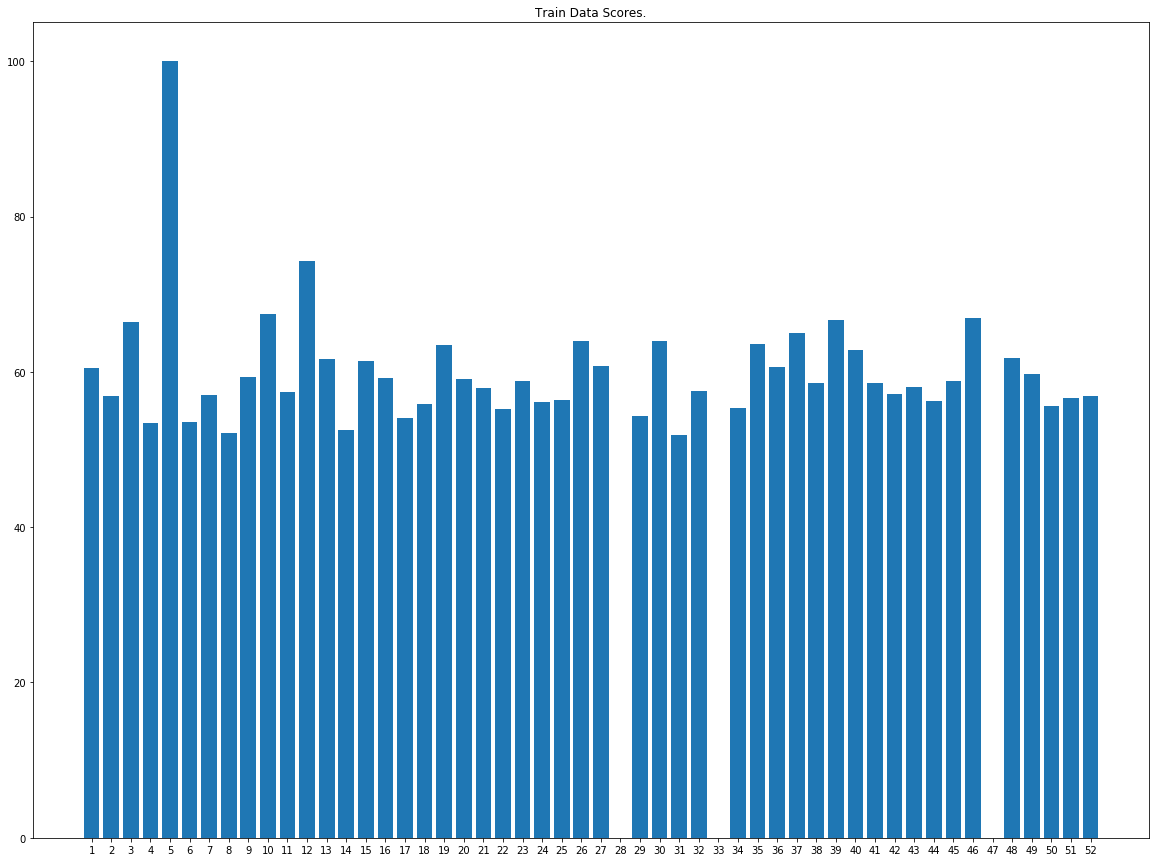

In [8]:
plt.bar(range(len(train_classification_accuracies)), list(ordered_train_classification_accuracies.values()), align='center')
plt.xticks(range(len(train_classification_accuracies)), list(ordered_train_classification_accuracies.keys()))
plt.title("Train Data Scores.")
plt.savefig('train_scores_blink_denoise.png')
plt.show()

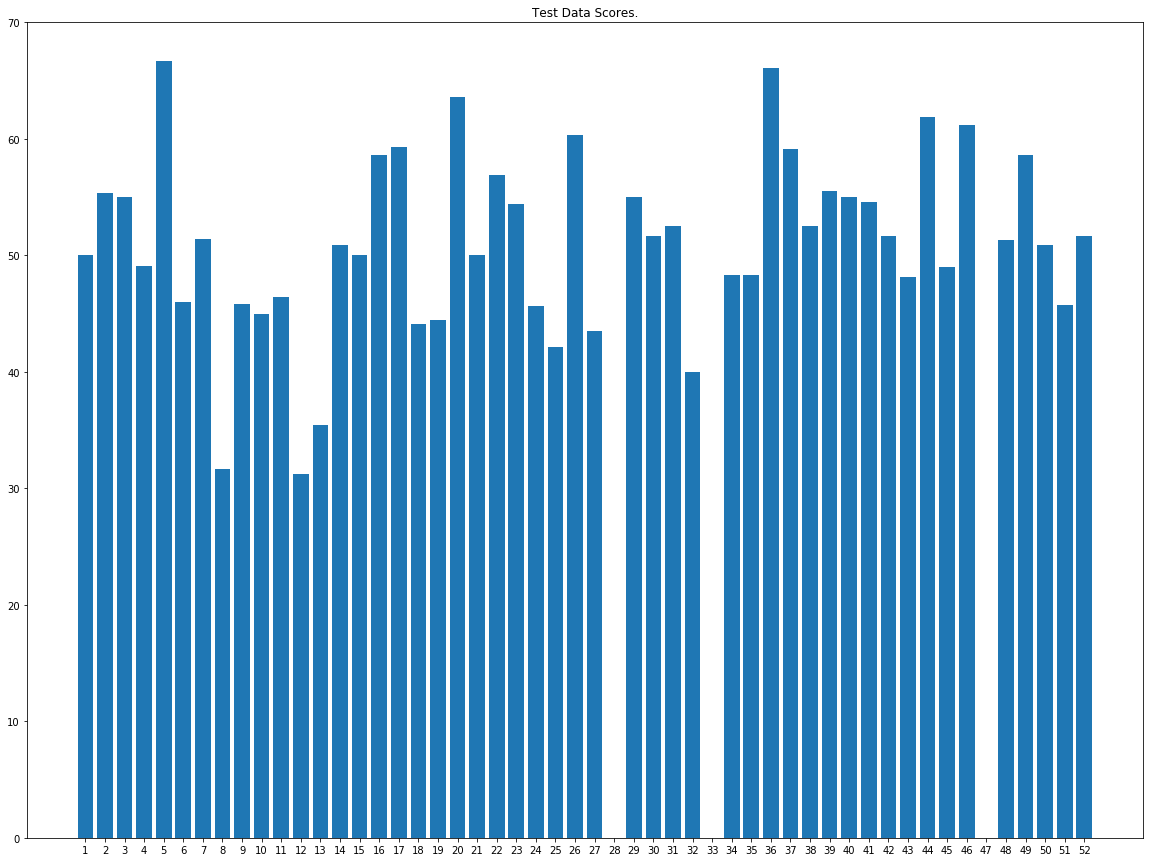

In [9]:
plt.bar(range(len(test_classification_accuracies)), list(ordered_test_classification_accuracies.values()), align='center')
plt.xticks(range(len(test_classification_accuracies)), list(ordered_test_classification_accuracies.keys()))
plt.title("Test Data Scores.")
plt.savefig('test_scores_blink_denoise.png')
plt.show()